<a href="https://colab.research.google.com/github/julenbhy/keras/blob/main/leaf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip 'drive/MyDrive/Colab Notebooks/data/archive.zip'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


SIZE = [512, 512]
NUM_CLASSES = 4
train_path = './data'

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=preprocess_input)



train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (512, 512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training',
                                                 shuffle=True)

val_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (512, 512),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='validation',
                                                 shuffle=True)


Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [5]:
##########          CNN Construction           ##########
vgg = VGG16(input_shape = SIZE + [3], weights = 'imagenet', include_top = False)

for layer in vgg.layers:
  layer.trainable = False


x = Flatten()(vgg.output)
prediction = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)


adam = Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

##########           Training           ##########

checkpoint = ModelCheckpoint(filepath='myCheckpointModel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]


history=model.fit(
  train_set,
  validation_data=val_set,
  epochs= 10,
  #callbacks=callbacks,
  verbose=1)

# Guardar el Modelo
model.save('mymodel.h5')

Epoch 1/10
105/105 [==============================] - 299s 3s/step - loss: 2.0894 - accuracy: 0.8329 - val_loss: 1.9128 - val_accuracy: 0.8804
Epoch 2/10
105/105 [==============================] - 265s 3s/step - loss: 1.6999 - accuracy: 0.8848 - val_loss: 2.1840 - val_accuracy: 0.8648
Epoch 3/10
105/105 [==============================] - 261s 2s/step - loss: 1.9262 - accuracy: 0.8947 - val_loss: 1.9771 - val_accuracy: 0.8959
Epoch 4/10
105/105 [==============================] - 265s 3s/step - loss: 2.0064 - accuracy: 0.8938 - val_loss: 1.8869 - val_accuracy: 0.9091
Epoch 5/10
105/105 [==============================] - 261s 2s/step - loss: 1.8452 - accuracy: 0.9072 - val_loss: 3.1324 - val_accuracy: 0.8720
Epoch 6/10
105/105 [==============================] - 259s 2s/step - loss: 2.0992 - accuracy: 0.9048 - val_loss: 2.5796 - val_accuracy: 0.9019
Epoch 7/10
105/105 [==============================] - 260s 2s/step - loss: 2.1647 - accuracy: 0.9042 - val_loss: 1.9511 - val_accuracy: 0.9187

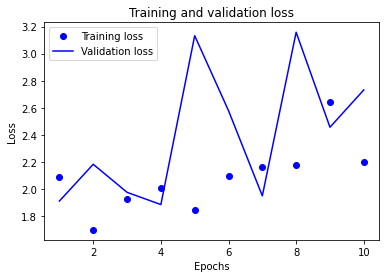

In [6]:
#plot the loss evolution
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

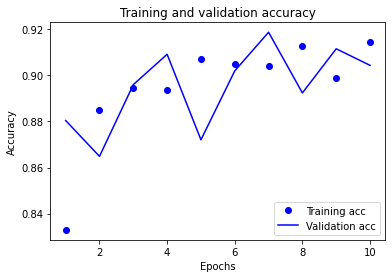

In [7]:
#plot the accuracy evolution
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [8]:
#Obtain the optimum number of epochs to avoid overfitting
max_accuracy = max(val_acc_values)
print ("Maximmum accuracy reached: ", max_accuracy)
max_index = val_acc_values.index(max_accuracy)
print("Maximmum accuracy reached at epoch: ",max_index+1)


#Evaluate the model 
#results = model.evaluate(x_test, y_test)
#print(results)

Maximmum accuracy reached:  0.9186602830886841
Maximmum accuracy reached at epoch:  7
